In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#Parameter setup
z1=1  # Upper decision threshold (choice 1)
z2=-1  # Lower decision threshol (choice 2)
sigma=0.2  # Size of the noise
A=0.03  # Drift rate
x0=0  # Starting point of decision variable x
dt=0.1  # Time step
t_total=10000
trial_total=1000
t = np.arange(0, t_total, dt)
    
#DDM run
decision_time_c=[]
decision_time_e=[]


#model/trial loop
for tri in range(trial_total): # Trial number
    
    x = np.zeros_like(t)
    x[0]=x0
    
    for p in range(len(x)-1): # Time
        x[p+1] = x[p]+(dt*A)+ sigma*np.sqrt(dt)*np.random.randn()# Update x
        
        if x[p]>=z1: #or x[p]<0:# Condition for making the correct response  
            x=x[0:p+1]
            
            decision_time_c.append(p*dt)

            break # Stop the time "for" loop  
            
        elif x[p]<=z2: #or x[p]<0:# Condition for making the error response   
            x=x[0:p+1]
            decision_time_e.append(p*dt)

            break # Stop the time "for" loop

(array([92., 63., 23.,  5.,  5.,  2.,  0.,  2.,  0.,  1.]),
 array([  1.5 ,  17.64,  33.78,  49.92,  66.06,  82.2 ,  98.34, 114.48,
        130.62, 146.76, 162.9 ]),
 <BarContainer object of 10 artists>)

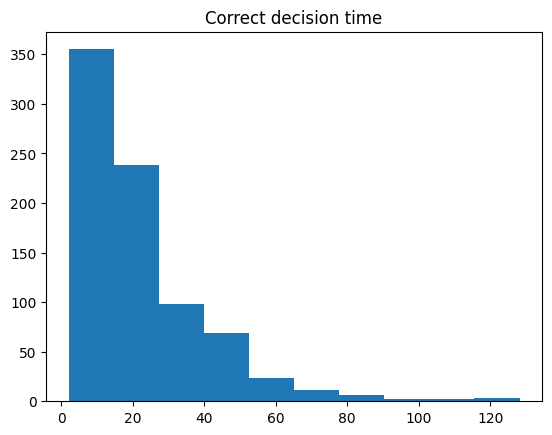

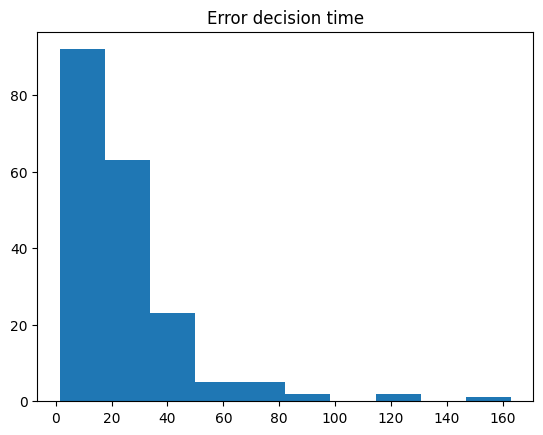

In [30]:
plt.figure()
plt.title("Correct decision time")
plt.hist(decision_time_c)
plt.figure()
plt.title("Error decision time")
plt.hist(decision_time_e)

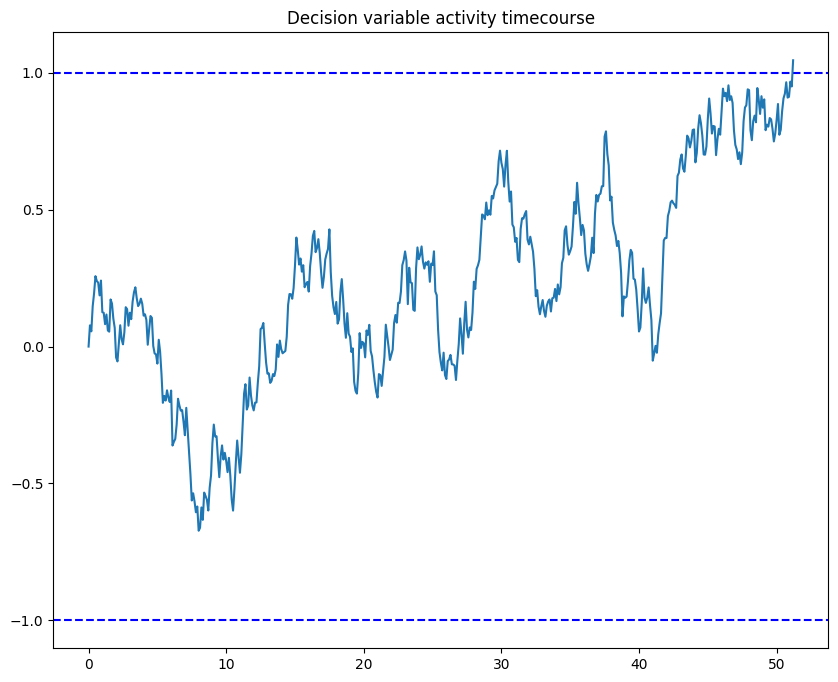

In [28]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.axhline(y=z1,linestyle="dashed", color="blue" ,label="decision threshold")
plt.axhline(y=z2,linestyle="dashed", color="blue" ,label="decision threshold")
plt.title("Decision variable activity timecourse")
plt.plot(t[0:len(x)],x)